In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"D:\ML\mobilePricePridiction\after_EDA_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ML\\mobilePricePridiction\\after_EDA_dataset.csv'

In [5]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [7]:
X = df.drop('price',axis=1)
y = df['price']

In [11]:
X.head()

,brand,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [13]:
y

0      74999
1      24997
2      47999
3      16999
4      33890
       ...  
896    27999
897    13980
898    16499
899    27990
900    43670
Name: price, Length: 901, dtype: int64

In [15]:
cat_cols = ['brand', 'processor_brand', 'os']

In [19]:
num_cols = [
    'reting','is_5g','is_nfc','is_ir_blaster','core',
    'proccessor_speed','ram','internal_memory','battery_size',
    'fast_charge','charging_speed','rear_mp','front_mp',
    'display_size','refresh_rate'
]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
a= OneHotEncoder()

In [33]:
a.fit(np.array(cat_cols).reshape(-1,1))

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [37]:
a.get_feature_names_out()

array(['x0_brand', 'x0_os', 'x0_processor_brand'], dtype=object)

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(drop='first'),cat_cols)
    ]
)

In [43]:
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])

In [45]:
model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [51]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.744631559148937
MAE: 8549.600427538851
RMSE: 11564.30101845489


In [53]:
model.fit(X_train,np.log1p(y_train))

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
y_log_pred = model.predict(X_test)

In [59]:
y_pred = np.expm1(y_log_pred)

In [61]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8401069447132865
MAE: 4908.281177863187
RMSE: 9150.621165294617


drope 

fast_charge → 0.04

is_ir_blaster → –0.05

charging_speed → 0.06

In [439]:
X = df.drop(['price','fast_charge','is_ir_blaster','charging_speed'],axis=1)
y = df['price']

In [441]:
df.columns

Index(['brand', 'price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster',
       'processor_brand', 'core', 'proccessor_speed', 'ram', 'internal_memory',
       'battery_size', 'fast_charge', 'charging_speed', 'rear_mp', 'front_mp',
       'os', 'display_size', 'refresh_rate'],
      dtype='object')

In [443]:
X.head()

,brand,reting,is_5g,is_nfc,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,92.0,1,1.0,Snapdragon,8,3.30,12.0,256,5000,200,12,Android,6.80,120
1,Oneplus,83.0,1,0.0,Dimensity,8,3.35,8.0,128,7100,50,16,Android,6.77,120
2,Apple,81.0,1,1.0,Bionic,6,3.46,6.0,128,3349,48,12,iOS,6.10,60
3,Realme,82.0,1,0.0,Dimensity,8,2.40,6.0,128,7000,50,50,Android,6.81,144
4,Samsung,84.0,1,1.0,Exynos,10,3.11,8.0,128,4700,50,10,Android,6.70,120


In [445]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [447]:
cat_cols1 = ['brand', 'processor_brand', 'os']

In [449]:
num_cols1 = [
    'reting','is_5g','core','is_nfc',
    'proccessor_speed','ram','internal_memory',
    'rear_mp','front_mp','battery_size','display_size','refresh_rate'
]

In [451]:
processor1  = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols1),
        ('cat',OneHotEncoder(drop='first'),cat_cols1)
    ]
)

In [453]:
model1 = Pipeline(
    steps=[
        ('processor',processor1),
        ('model',LinearRegression())
    ]
)

In [455]:
model1.fit(X_train,np.log1p(y_train))

,steps,"[('processor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [457]:
y_log_pred = model1.predict(X_test)

In [459]:
y_pred = np.expm1(y_log_pred)

In [461]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8413744901456246
MAE: 4932.350036065437
RMSE: 9114.278414465318


In [463]:
corr = df[num_cols1].corr()

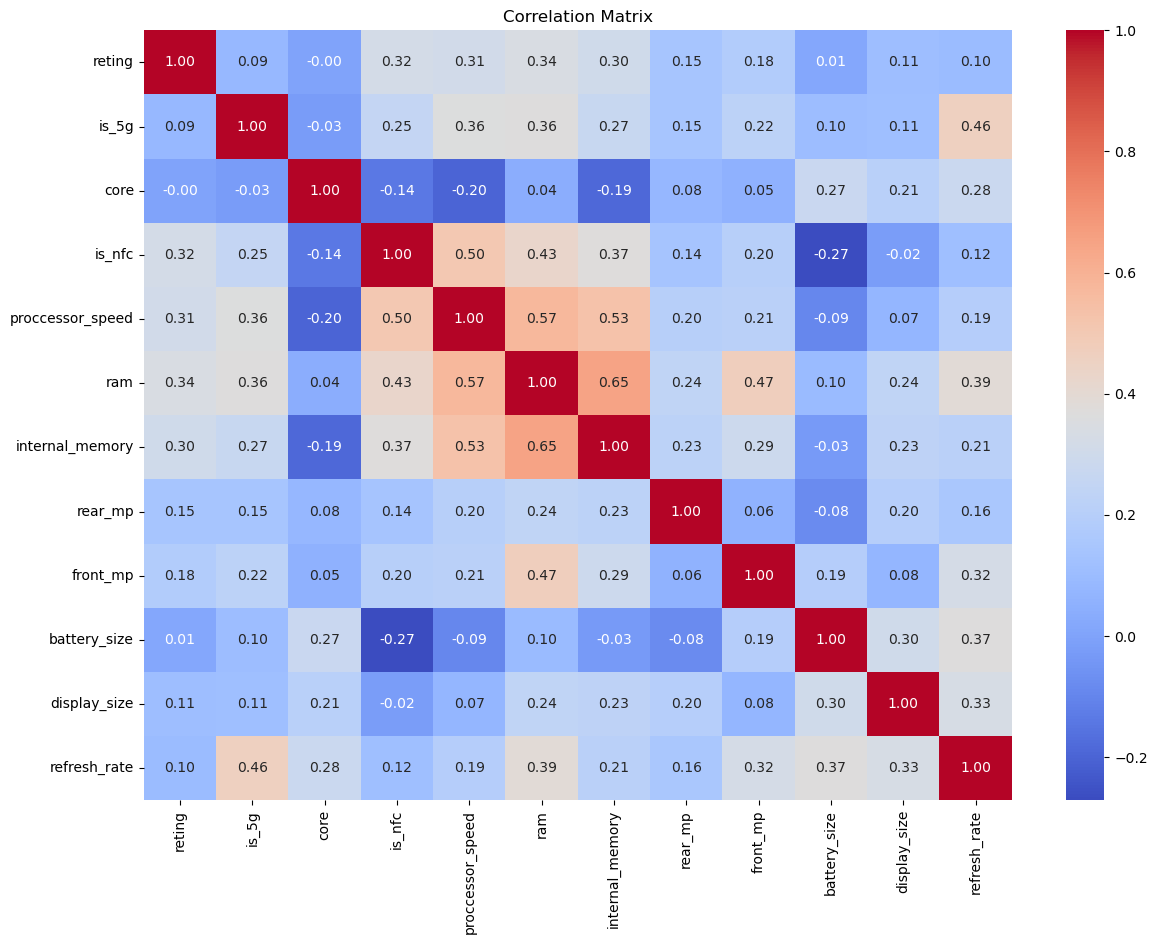

In [465]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [540]:
X = df.drop(['price','fast_charge','is_ir_blaster','charging_speed'],axis=1)
y = df['price']

In [542]:
cat_cols1 = ['brand', 'processor_brand', 'os']

In [544]:
num_cols1 = [
    'reting','is_5g','core','is_nfc',
    'proccessor_speed','ram','internal_memory',
    'rear_mp','front_mp','battery_size','display_size','refresh_rate'
]

In [546]:
X_num = df[num_cols1]    
X_cat = df[cat_cols1]

In [548]:
X_cat = pd.get_dummies(X_cat,drop_first=True).astype(int)

In [550]:
X_cat.shape

(901, 26)

In [552]:
X_cat

,brand_Apple,brand_Cmf,brand_Google,brand_Hmd,brand_Honor,brand_Infinix,brand_Iqoo,brand_Lava,brand_Motorola,brand_Nothing,...,brand_Vivo,brand_Xiaomi,processor_brand_Dimensity,processor_brand_Exynos,processor_brand_Helio,processor_brand_Snapdragon,processor_brand_Tensor,processor_brand_Tiger,processor_brand_Unisoc,os_iOS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
897,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
898,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
899,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [554]:
X = pd.concat([X_num, X_cat], axis=1)

In [556]:
X.head()

,reting,is_5g,core,is_nfc,proccessor_speed,ram,internal_memory,rear_mp,front_mp,battery_size,...,brand_Vivo,brand_Xiaomi,processor_brand_Dimensity,processor_brand_Exynos,processor_brand_Helio,processor_brand_Snapdragon,processor_brand_Tensor,processor_brand_Tiger,processor_brand_Unisoc,os_iOS
0,92.0,1,8,1.0,3.30,12.0,256,200,12,5000,...,0,0,0,0,0,1,0,0,0,0
1,83.0,1,8,0.0,3.35,8.0,128,50,16,7100,...,0,0,1,0,0,0,0,0,0,0
2,81.0,1,6,1.0,3.46,6.0,128,48,12,3349,...,0,0,0,0,0,0,0,0,0,1
3,82.0,1,8,0.0,2.40,6.0,128,50,50,7000,...,0,0,1,0,0,0,0,0,0,0
4,84.0,1,10,1.0,3.11,8.0,128,50,10,4700,...,0,0,0,1,0,0,0,0,0,0


In [558]:
X.shape

(901, 38)

In [560]:
def standard_scale_df(df):
    df_scaled = df.copy()
    num_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        mean = df_scaled[col].mean()
        std  = df_scaled[col].std()
        
        if std != 0:
            df_scaled[col] = (df_scaled[col] - mean) / std
        else:
            df_scaled[col] = 0
    
    return df_scaled

In [562]:
df_scaled = standard_scale_df(X)

In [564]:
df_scaled.head()

,reting,is_5g,core,is_nfc,proccessor_speed,ram,internal_memory,rear_mp,front_mp,battery_size,...,brand_Vivo,brand_Xiaomi,processor_brand_Dimensity,processor_brand_Exynos,processor_brand_Helio,processor_brand_Snapdragon,processor_brand_Tensor,processor_brand_Tiger,processor_brand_Unisoc,os_iOS
0,1.238980,0.330884,0.125650,1.108527,1.212698,1.273392,0.288530,5.412009,-0.618701,-0.346731,...,0,0,0,0,0,1,0,0,0,0
1,0.021261,0.330884,0.125650,-0.901097,1.307137,-0.083186,-0.581693,-0.197398,-0.325268,2.366711,...,0,0,1,0,0,0,0,0,0,0
2,-0.249343,0.330884,-4.067350,1.108527,1.514903,-0.761475,-0.581693,-0.272190,-0.618701,-2.480014,...,0,0,0,0,0,0,0,0,0,1
3,-0.114041,0.330884,0.125650,-0.901097,-0.487205,-0.761475,-0.581693,-0.197398,2.168915,2.237499,...,0,0,1,0,0,0,0,0,0,0
4,0.156563,0.330884,4.318651,1.108527,0.853830,-0.083186,-0.581693,-0.197398,-0.765418,-0.734366,...,0,0,0,1,0,0,0,0,0,0


In [602]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled,y,test_size=0.2,random_state=42)

In [604]:
X_train

,reting,is_5g,core,is_nfc,proccessor_speed,ram,internal_memory,rear_mp,front_mp,battery_size,...,brand_Vivo,brand_Xiaomi,processor_brand_Dimensity,processor_brand_Exynos,processor_brand_Helio,processor_brand_Snapdragon,processor_brand_Tensor,processor_brand_Tiger,processor_brand_Unisoc,os_iOS
10,-0.384645,0.330884,0.12565,1.108527,1.307137,-0.083186,0.288530,-0.197398,2.168915,0.945384,...,0,0,1,0,0,0,0,0,0,0
375,-0.249343,0.330884,0.12565,-0.901097,-0.298327,-0.083186,-0.581693,-0.197398,2.168915,0.299326,...,1,0,1,0,0,0,0,0,0,0
247,0.156563,0.330884,0.12565,-0.901097,-0.487205,-0.761475,-0.581693,1.971573,-0.325268,-0.346731,...,0,1,1,0,0,0,0,0,0,0
388,-0.181692,0.330884,0.12565,-0.901097,-0.487205,-0.761475,-0.581693,-0.197398,-1.132210,0.945384,...,0,0,1,0,0,0,0,0,0,0
433,0.833074,0.330884,-4.06735,1.108527,2.629284,-0.083186,2.028975,-0.272190,-0.618701,-0.753748,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.136268,0.330884,0.12565,-0.901097,-0.109449,-1.439765,-0.581693,-0.197398,-0.912135,1.591442,...,1,0,1,0,0,0,0,0,0,0
270,0.156563,0.330884,0.12565,1.108527,1.552679,2.629970,0.288530,-0.197398,1.582049,-0.088308,...,0,0,0,0,0,0,1,0,0,0
860,-0.114041,0.330884,0.12565,-0.901097,-0.109449,-0.083186,-0.581693,1.971573,-0.325268,-0.346731,...,0,0,1,0,0,0,0,0,0,0
435,-0.114041,0.330884,0.12565,-0.901097,-0.864961,-1.439765,-1.016804,-0.197398,-1.132210,-0.346731,...,0,0,1,0,0,0,0,0,0,0


In [606]:
X_train = np.c_[np.ones(X_train.shape[0]),X_train]
X_test = np.c_[np.ones(X_test.shape[0]),X_test]

In [608]:
X_train.shape

(720, 39)

In [610]:
X_train

array([[ 1.        , -0.38464541,  0.33088406, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.2493433 ,  0.33088406, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.156563  ,  0.33088406, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.1140412 ,  0.33088406, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.1140412 ,  0.33088406, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.1140412 ,  0.33088406, ...,  0.        ,
         0.        ,  0.        ]])

In [612]:
X_test.shape

(181, 39)

In [620]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [622]:
y_train

array([[ 27420],
       [ 24999],
       [ 14499],
       [ 10998],
       [148900],
       [ 34598],
       [ 15990],
       [ 57999],
       [ 40999],
       [ 10999],
       [ 15999],
       [ 22999],
       [ 23999],
       [ 27999],
       [  8699],
       [ 20999],
       [ 23999],
       [ 18159],
       [ 24999],
       [103399],
       [  9499],
       [ 24990],
       [  6099],
       [ 97999],
       [  9998],
       [ 12999],
       [ 30998],
       [ 24999],
       [ 11990],
       [  8999],
       [ 20999],
       [ 33999],
       [ 28999],
       [ 54999],
       [ 16990],
       [ 15999],
       [ 20990],
       [ 70999],
       [ 26399],
       [ 15998],
       [ 16798],
       [ 23999],
       [ 10499],
       [  6688],
       [ 23999],
       [ 30999],
       [ 10026],
       [ 20999],
       [ 19999],
       [ 23990],
       [  6999],
       [ 18499],
       [ 58999],
       [ 26990],
       [ 39998],
       [ 47999],
       [ 20999],
       [ 22991],
       [ 17999

In [624]:
y_train.shape

(720, 1)

In [626]:
weights = np.zeros((X_train.shape[1], 1))

In [628]:
weights

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [630]:
df = pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\DS\ML\L R\after_EDA_dataset.csv")

In [636]:
pd.get_dummies(df, drop_first=True).astype(int).shape

(901, 42)

In [640]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [772]:
X = df.drop(['price','fast_charge','is_ir_blaster','charging_speed'],axis=1)
y = df['price']

In [650]:
X.head()

,brand,reting,is_5g,is_nfc,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,92.0,1,1.0,Snapdragon,8,3.30,12.0,256,5000,200,12,Android,6.80,120
1,Oneplus,83.0,1,0.0,Dimensity,8,3.35,8.0,128,7100,50,16,Android,6.77,120
2,Apple,81.0,1,1.0,Bionic,6,3.46,6.0,128,3349,48,12,iOS,6.10,60
3,Realme,82.0,1,0.0,Dimensity,8,2.40,6.0,128,7000,50,50,Android,6.81,144
4,Samsung,84.0,1,1.0,Exynos,10,3.11,8.0,128,4700,50,10,Android,6.70,120


In [774]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [776]:
X_train.values

array([['Motorola', 80.0, 1, ..., 'Android', 6.7, 120],
       ['Vivo', 81.0, 1, ..., 'Android', 6.77, 120],
       ['Xiaomi', 84.0, 1, ..., 'Android', 6.67, 120],
       ...,
       ['Realme', 82.0, 1, ..., 'Android', 6.7, 120],
       ['Poco', 82.0, 1, ..., 'Android', 6.74, 90],
       ['Realme', 82.0, 1, ..., 'Android', 6.72, 120]], dtype=object)

In [658]:
m,n = X_train.shape
print(m,n)

720 15


In [660]:
np.zeros(n)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [736]:
X_test.shape

(181, 15)

In [790]:
class MeraLinearRegression:
    def __init__(self,lr=0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.corf_ = None
        self.intercept_ = None
        self.mean_ = None
        self.std_ = None
        self.columns_ = None

    
    def _standardScale(self,X,fit=False):
        if fit:
            self.mean_ = X.mean()
            self.std_ = X.std().replace(0,1)
            
        return (X-self.mean_)/self.std_


    def fit(self,X_train,y_train):
        X_train = pd.get_dummies(X_train,drop_first=True).astype(int)
        self.columns_ = X_train.columns

        X_train = self._standardScale(X_train,fit=True)

        X_train = X_train.values
        y_train = y_train.values

        row,col = X_train.shape

        self.corf_ = np.zeros(col)
        self.intercept_ = 0;
        
        for i in range(self.epochs):
            y_pred = np.dot(X_train,self.corf_) + self.intercept_

            dw = (1/row) * np.dot(X_train.T,(y_pred - y_train))
            db = (1/row) * np.sum(y_pred - y_train)

            self.corf_ -= self.lr * dw
            self.intercept_ -= self.lr * db
            print("epochs ",i,"coeff :",self.corf_ ,"  ","intercet :",self.intercept_)


    def predict(self,X_test):
        X_test = pd.get_dummies(X_test,drop_first=True).astype(int)

        X_test = X_test.reindex(columns=self.columns_,fill_value=0)

        X_test = self._standardScale(X_test,fit=False)

        X_test = X_test.values
        return np.dot(X_test,self.corf_) + self.intercept_

In [5]:
def _standardScale(X,fit=False):
    if fit:
        mean = X.mean()
        std = X.std().replace(0,1)
            
    return (X-mean)/std

In [ ]:
def fit(X_train,y_train):
    X_train = pd.get_dummies(X_train,drop_first=True).astype(int)
    self.column = X_train.columns

    X_train = self.standardScale(X_train,fit=True)

    X_train = X_train.values
    y_train = y_train.values

    row,col = X_train.shape

    corf= np.zeros(col)
    intercept= 0;
        
    for i in range(epochs):
        y_pred = np.dot(X_train,corf) + intercept

        dw = (1/row) * np.dot(X_train.T,(y_pred - y_train))
        db = (1/row) * np.sum(y_pred - y_train)

        corf -= self.lr * dw
        intercept -= self.lr * db